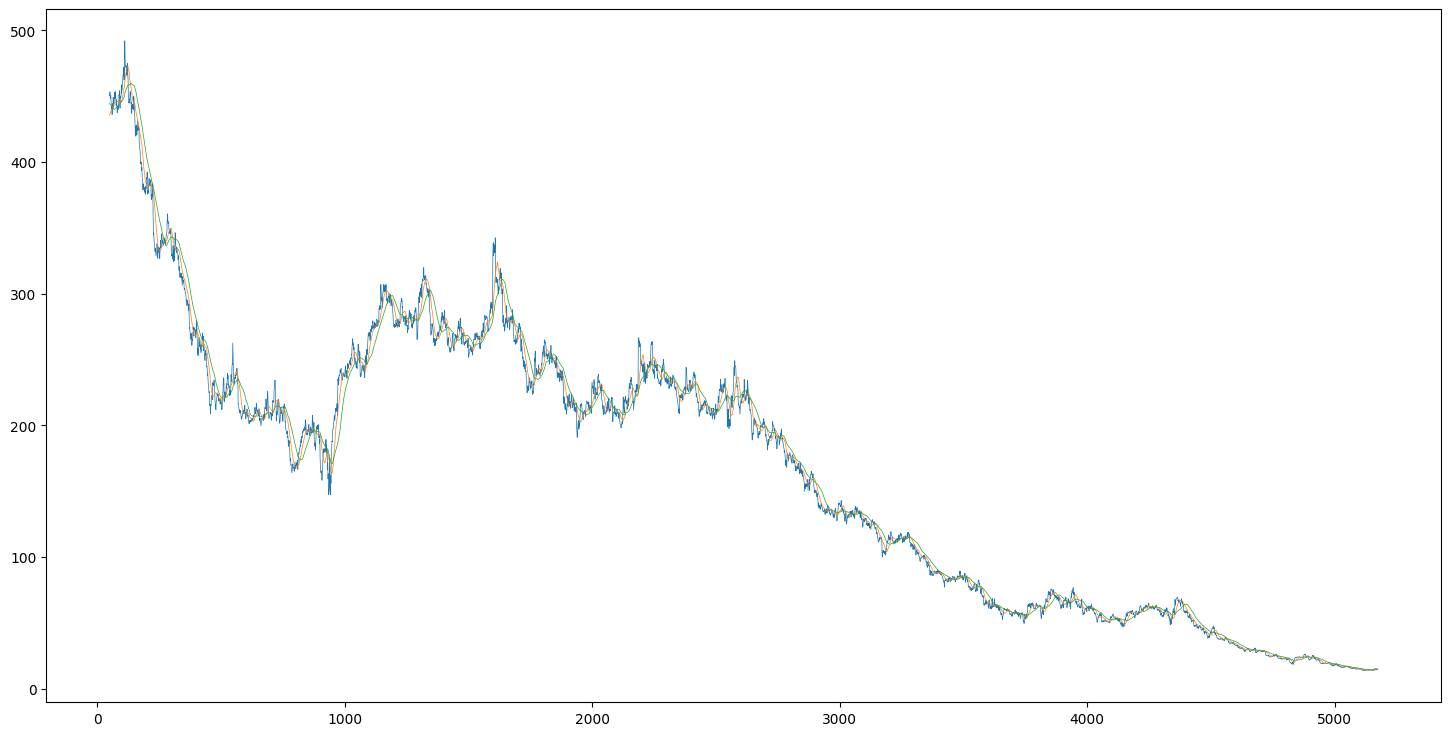

<ipython-input-10-df3ecefdb86f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change']=df['close'].diff()
<ipython-input-10-df3ecefdb86f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change']=df['change']*-1
<ipython-input-10-df3ecefdb86f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

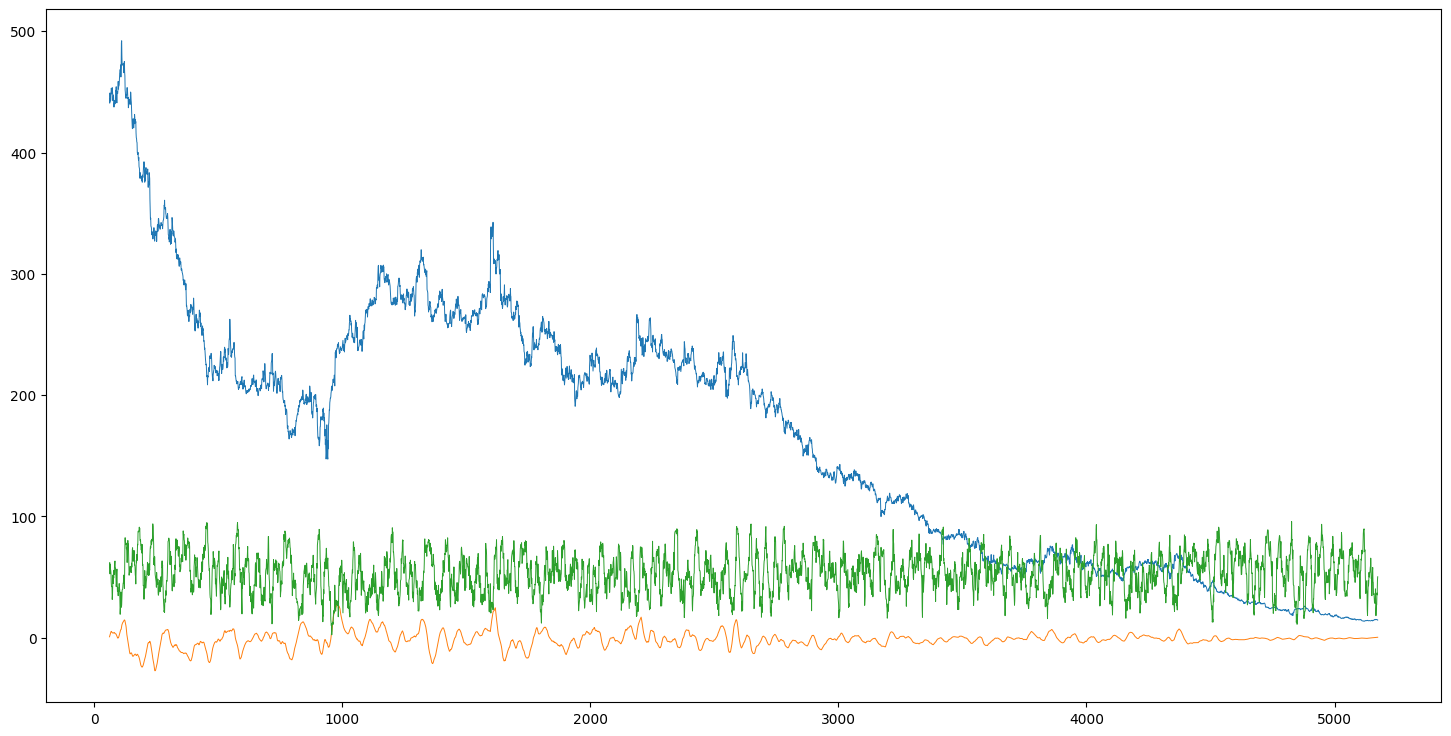

Total return from the strategy is 266.28%


<ipython-input-10-df3ecefdb86f>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


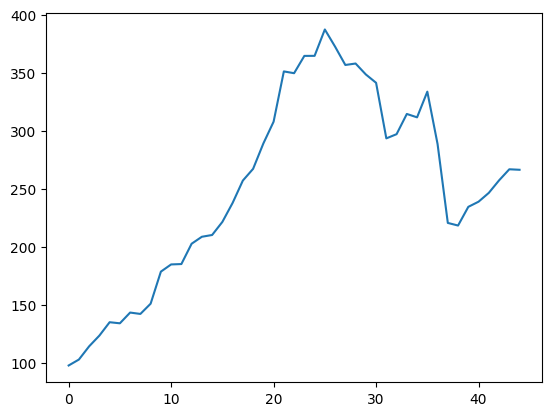

In [10]:

import requests
import pandas as pd
from matplotlib import pyplot as plt
url = 'https://api.upstox.com/v2/historical-candle/NSE_EQ%7CINE154A01025/day/2024-01-01/2000-01-01'
headers = {
    'Accept': 'application/json'
}

response = requests.get(url, headers=headers)

# Check the response status
if response.status_code == 200:
    # Do something with the response data (e.g., print it)
    x=5
    #print(response.json())
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

columns= ['timestamp','open','high','low','close','volume','open intrest']
data=response.json()
candles=data['data']
df=pd.DataFrame(candles['candles'],columns=columns)
df['20 day SMA']=df['close'].rolling(window=20).mean()
df['50 day SMA']=df['close'].rolling(window=50).mean()
df.dropna(inplace=True)
df=df.iloc[::-1]
'''x=range(len(df))
plt.plot(x,df['close'])
plt.plot(x,df['20 day SMA'])
plt.plot(x,df['50 day SMA'])
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)'''
plt.figure(figsize=(18, 9))
plt.plot(df['close'],linewidth=0.5)
plt.plot(df['20 day SMA'],linewidth=0.5)
plt.plot(df['50 day SMA'],linewidth=0.5)
plt.show()
#df[['close','20 day SMA','50 day SMA']].plot(figsize=(16, 8))

df=df.iloc[::-1]
df['change']=df['close'].diff()
df['change']=df['change']*-1
df['gain']=df['change'].apply(lambda x: x if x>0 else 0)
df['loss']=df['change'].apply(lambda x: abs(x) if x<0 else 0)
df['avg gain']=df['gain'].rolling(window=14).mean()
df['avg loss']=df['loss'].rolling(window=14).mean()
df['RSI']=100-(100/(1+((df['avg gain']/df['avg loss']))))
df.dropna(inplace=True)
df.drop(['gain','loss','avg gain','avg loss'],axis=1,inplace=True)
df.dropna(inplace=True)
df['MACD']=df['20 day SMA']-df['50 day SMA']
#df[['close','MACD','RSI']].plot(figsize=(16, 8))
plt.figure(figsize=(18, 9))
plt.plot(df['close'],linewidth=0.7)
plt.plot(df['MACD'],linewidth=0.7)
plt.plot(df['RSI'],linewidth=0.7)
plt.show()
df['return']=0
df
bought=False
fund=100
for i in range(4210,62,-1):
  if df['MACD'][i]>0 and bought==False:
    buy_price=df.loc[i,'close']
    bought=True
  elif df['MACD'][i]<0 and bought==True:
    sell_price=df.loc[i,'close']
    returns=((sell_price-buy_price)/buy_price)*fund
    df.loc[i,'return']=returns
    fund+=df.loc[i,'return']
    df.loc[i,'fund']=fund
    bought=False
#print(df.to_string())
df2=df[['fund']]
df2.dropna(inplace=True)
funds=pd.Series(df2['fund'])
fund_list=list(funds)
fund_list=fund_list[::-1]
print(f'Total return from the strategy is {fund_list[-1]:.2f}%')
plt.plot(fund_list)
plt.show()